In [1]:
import numpy as np
import pandas as pd

dtypes = {
}


df = pd.read_csv("steam_all.txt", sep="\t", parse_dates=["DateStamp", "SalesDate"])
df

,DateStamp,SalesDate,SteamProductId,ProductTitle,Type,TitleName,Platform,Country,PurchaseQuantity,NetSteamSalesUSD
0,2012-01-07,2012-01-01,8263,Fable 3 Understone Quest Pack,Steam,Fable III - Understone Quest Pack,Windows,South Africa,1,2.4900
1,2012-01-07,2012-01-01,8259,Fable 3 Traitor's Keep Quest Pack,Steam,Fable III - Traitor's keep Quest Pack,Windows,Spain,1,3.6384
2,2012-01-07,2012-01-01,8262,Fable 3 Dog Outfit,Steam,Fable III - Dog Outfit,Windows,Australia,1,0.9900
3,2012-01-07,2012-01-01,13123,Fable The Lost Chapters,Steam,Fable - The Lost Chapters,Windows,Romania,1,4.6036
4,2012-01-07,2012-01-01,13123,Fable The Lost Chapters,Steam,Fable - The Lost Chapters,Windows,South Africa,3,14.9700
...,...,...,...,...,...,...,...,...,...,...
5873082,2023-10-21,2023-10-15,653510,Age of Empires III: Definitive Edition - Mexic...,Retail,Age of Empires III: Definitive Edition - Mexic...,Windows,Netherlands,1,0.0000
5873083,2023-10-21,2023-10-15,655956,Forza Horizon 5 Ferrari 2018 FXX-K Evo,Steam,Forza Horizon 5 Ferrari 2018 FXX-K Evo,Windows,Belgium,1,2.0836
5873084,2023-10-21,2023-10-15,703016,Forza Horizon 5 2018 Audi RS 5,Steam,Forza Horizon 5 2018 Audi RS 5,Windows,Austria,1,2.0899
5873085,2023-10-21,2023-10-15,770725,Age of Empires III: Definitive Edition – Hero ...,Steam,Age of Empires III: Definitive Edition – Hero ...,Windows,Hong Kong,2,1.5321


In [2]:
sf = df[df.TitleName.str.contains("starfield|forza horizon 5|forza motorsport", case=False, regex=True)]
sf

,DateStamp,SalesDate,SteamProductId,ProductTitle,Type,TitleName,Platform,Country,PurchaseQuantity,NetSteamSalesUSD
2921658,2021-06-26,2021-06-25,547830,Forza Horizon 5 for Beta Testing (retail),Retail,Forza Horizon 5,Windows,Poland,3,0.0000
2936703,2021-07-03,2021-06-28,547830,Forza Horizon 5 for Beta Testing (retail),Retail,Forza Horizon 5,Windows,Poland,1,0.0000
2937487,2021-07-03,2021-06-28,547830,Forza Horizon 5 for Beta Testing (retail),Retail,Forza Horizon 5,Windows,United Kingdom,1,0.0000
2942441,2021-07-03,2021-06-29,547830,Forza Horizon 5 for Beta Testing (retail),Retail,Forza Horizon 5,Windows,Poland,1,0.0000
2947650,2021-07-03,2021-07-01,547830,Forza Horizon 5 for Beta Testing (retail),Retail,Forza Horizon 5,Windows,United Kingdom,1,0.0000
...,...,...,...,...,...,...,...,...,...,...
5873077,2023-10-21,2023-10-15,572149,Forza Horizon 5 Treasure Map,Steam,Forza Horizon 5 Treasure Map,Windows,Austria,1,2.6232
5873078,2023-10-21,2023-10-15,572149,Forza Horizon 5 Treasure Map,Steam,Forza Horizon 5 Treasure Map,Windows,Hong Kong,2,5.8763
5873083,2023-10-21,2023-10-15,655956,Forza Horizon 5 Ferrari 2018 FXX-K Evo,Steam,Forza Horizon 5 Ferrari 2018 FXX-K Evo,Windows,Belgium,1,2.0836
5873084,2023-10-21,2023-10-15,703016,Forza Horizon 5 2018 Audi RS 5,Steam,Forza Horizon 5 2018 Audi RS 5,Windows,Austria,1,2.0899


In [ ]:
sf.to_csv("data.csv")

In [11]:
len(df[["TitleName", "ProductTitle", "SteamProductId"]].apply(tuple, axis=1).unique())

313

In [26]:
fo = df[df.TitleName.str.contains("fallout", case=False)]
pt = fo.pivot_table(index="SalesDate", columns=["TitleName"], values="PurchaseQuantity", aggfunc=np.sum)
pt.reset_index().SalesDate.describe(datetime_is_numeric=True)

count                     94
mean     2023-07-17 12:00:00
min      2023-06-01 00:00:00
25%      2023-06-24 06:00:00
50%      2023-07-17 12:00:00
75%      2023-08-09 18:00:00
max      2023-09-02 00:00:00
Name: SalesDate, dtype: object

<AxesSubplot: xlabel='SalesDate'>

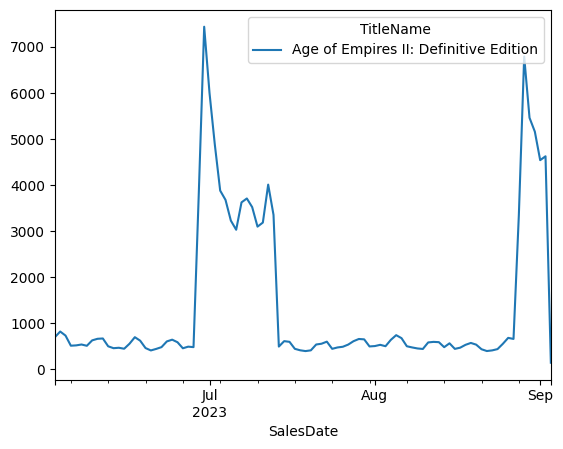

In [27]:
af = df[df.TitleName == "Age of Empires II: Definitive Edition"]
pt = af.pivot_table(index="SalesDate", columns=["TitleName"], values="PurchaseQuantity", aggfunc=np.sum)
pt[pt.index > "2023-06-01"].plot()

In [28]:
pt[pt.index > "2020-01-01"].describe()

TitleName,Age of Empires II: Definitive Edition
count,1341.000000
mean,1847.268456
std,1896.180312
min,136.000000
25%,670.000000
50%,1110.000000
75%,2229.000000
max,13229.000000


In [29]:
pt[pt.index > "2023-06-01"].head(50)

TitleName,Age of Empires II: Definitive Edition
SalesDate,
2023-06-02,690
2023-06-03,814
2023-06-04,726
2023-06-05,506
2023-06-06,513
2023-06-07,532
2023-06-08,504
2023-06-09,622
2023-06-10,656


<AxesSubplot: xlabel='SalesDate'>

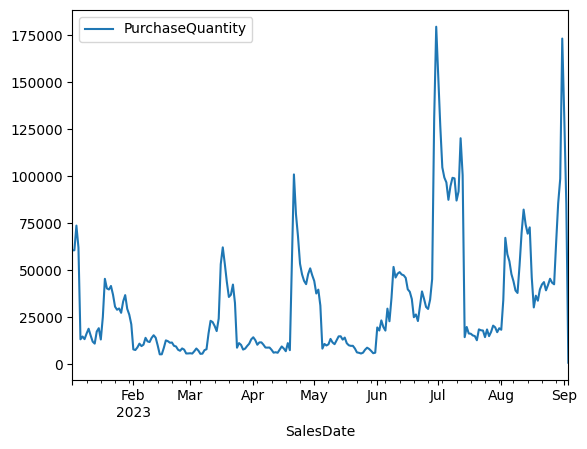

In [30]:
pt = df.pivot_table(index="SalesDate", values="PurchaseQuantity", aggfunc=np.sum)
pt[pt.index > "2023-01-01"].plot()

<AxesSubplot: xlabel='SalesDate'>

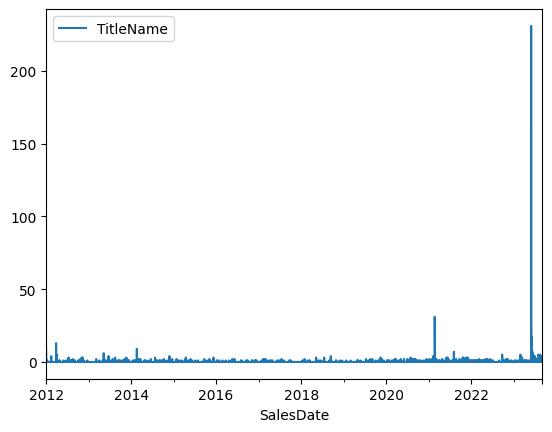

In [31]:
releases = df.pivot_table(index="TitleName", values="SalesDate", aggfunc=np.min).reset_index()
releases = releases.pivot_table(index="SalesDate", values="TitleName", aggfunc=np.count_nonzero)
releases = df[["SalesDate"]].pivot_table(index="SalesDate").merge(releases, on="SalesDate", how="left").fillna(0)
releases.plot()

In [4]:
releases.describe()
releases[releases.SalesDate == "2023-06-01"]

C:\Users\a-wlumme\AppData\Local\Temp\ipykernel_4820\3758499283.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  releases.describe()


,TitleName,SalesDate
72,An Elder Scrolls Legend: Battlespire,2023-06-01
74,Arx Fatalis,2023-06-01
80,BRINK,2023-06-01
94,Brink Agents of Change DLC,2023-06-01
96,Brink DLC: Doom/Psycho Combo Pack,2023-06-01
...,...,...
1051,Wolfenstein: Youngblood Deluxe,2023-06-01
1053,Wolfenstein: Youngblood Deluxe (DE) Thirdparty...,2023-06-01
1056,Wolfenstein: Youngblood Deluxe (WW) (retail),2023-06-01
1060,Wolfenstein: Youngblood Deutsche Version,2023-06-01


In [2]:
df = pd.read_csv("steam_2023-08-28_to_2023-09-10_all.txt", sep="\t")
df


NameError: name 'pd' is not defined

In [1]:
new_titles= df[df.Publisher.isna()][["TitleName", "ProductTitle", "SteamProductId"]].apply(tuple).unique()

NameError: name 'df' is not defined

In [34]:
# beth = ["STARFIELD PREMIUM EDITION UPGRADE (Region 2 (Middle)) (retail)",
# "Fallout 76: The Pitt Deluxe (Region 3 (Low)) (retail)",
# "The Elder Scrolls Online - High Isle SE Full (Region 3 (Low)) (retail)",
# "DEATHLOOP - PreOrder",
# "Fallout 76: Steel Dawn Deluxe",
# "DOOM Eternal Deluxe Edition (Regional Post-Launch) (retail)",
# "Quake Champions - 5000 Platinum",
# "The Skyrim Anniversary Edition (Region 2 (Middle)) (retail)",
# "DEATHLOOP - Deluxe",
# "Quake Champions - 500 Platinum",
# "Rage Soundtrack",
# "Wolfenstein: Youngblood Deluxe (Region 3 (Low)) (retail)",
# "DOOM Eternal Standard Edition Thirdparty Retail (retail)",
# "Rage (AU) (retail)",
# "DEATHLOOP - PreOrder",
# "Hi-Fi RUSH Deluxe Edition PC (Region 3 (Low)) (retail)",
# "The Elder ScrollsÂ® Online: Tamriel Unlimited Humble Monthly (retail)",
# "Ghostwire: Tokyo Original Game Soundtrack"]

# df = df[~df.ProductTitle.isin(beth)]
# df


In [35]:
# df.to_csv("steam_2023-08-28_to_2023-09-10.txt", index=False, sep="\t")